Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Shape of images array: (200, 128, 128, 3)
[[15  6]
 [14  5]]
              precision    recall  f1-score   support

           0       0.52      0.71      0.60        21
           1       0.45      0.26      0.33        19

    accuracy                           0.50        40
   macro avg       0.49      0.49      0.47        40
weighted avg       0.49      0.50      0.47        40



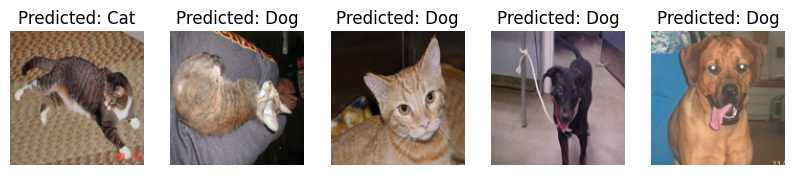

In [2]:
import os
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Define dataset paths in Google Drive
cat_path = "/content/drive/My Drive/Task 3/Cat"
dog_path = "/content/drive/My Drive/Task 3/Dog"
# Check if directories exist
if not os.path.exists(cat_path):
    print(f"Cat images directory does not exist: {cat_path}")
if not os.path.exists(dog_path):
    print(f"Dog images directory does not exist: {dog_path}")

# Load images and labels using Pillow
def load_images_and_labels(cat_path, dog_path):
    images = []
    labels = []

    # Load cat images
    for img in os.listdir(cat_path):
        img_path = os.path.join(cat_path, img)
        try:
            image = Image.open(img_path)
            image = image.resize((128, 128))  # Resize to 128x128
            image = np.array(image)  # Convert to NumPy array

            # Ensure the image has 3 channels (RGB)
            if len(image.shape) == 3 and image.shape[2] == 3:
                images.append(image)
                labels.append(0)  # 0 for cat
            else:
                print(f"Skipping non-RGB cat image: {img_path}")

        except Exception as e:
            print(f"Skipping corrupt or unreadable cat image: {img_path} - {e}")

    # Load dog images
    for img in os.listdir(dog_path):
        img_path = os.path.join(dog_path, img)
        try:
            image = Image.open(img_path)
            image = image.resize((128, 128))  # Resize to 128x128
            image = np.array(image)  # Convert to NumPy array

            # Ensure the image has 3 channels (RGB)
            if len(image.shape) == 3 and image.shape[2] == 3:
                images.append(image)
                labels.append(1)  # 1 for dog
            else:
                print(f"Skipping non-RGB dog image: {img_path}")

        except Exception as e:
            print(f"Skipping corrupt or unreadable dog image: {img_path} - {e}")

    # Convert lists to NumPy arrays
    images_array = np.array(images)
    labels_array = np.array(labels)

    # Check the shape of the images array
    print("Shape of images array:", images_array.shape)

    return images_array, labels_array

# If directories exist, proceed to load images
if os.path.exists(cat_path) and os.path.exists(dog_path):
    images, labels = load_images_and_labels(cat_path, dog_path)

    if images.size > 0:  # Check if images array is not empty
        # Flatten the images for SVM
        num_samples, img_height, img_width, num_channels = images.shape
        X = images.reshape(num_samples, img_height * img_width * num_channels)

        # Split the data into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=42)

        # Create the SVM model
        svm_model = SVC(kernel='linear')  # You can also try 'rbf', 'poly', etc.
        svm_model.fit(X_train, y_train)

        # Make predictions
        y_pred = svm_model.predict(X_test)

        # Evaluate the model
        print(confusion_matrix(y_test, y_pred))
        print(classification_report(y_test, y_pred))

        # Optional: Visualize some predictions
        def visualize_predictions(X_test, y_test, y_pred, num_images=5):
            plt.figure(figsize=(10, 5))
            for i in range(num_images):
                plt.subplot(1, num_images, i + 1)
                plt.imshow(X_test[i].reshape(img_height, img_width, num_channels))
                plt.title('Predicted: ' + ('Dog' if y_pred[i] == 1 else 'Cat'))
                plt.axis('off')
            plt.show()

        visualize_predictions(X_test, y_test, y_pred)
    else:
        print("No valid images loaded.")
else:
    print("Make sure both Cat and Dog directories exist.")
